In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
with open("../Field Names.csv", 'r') as f:
    columns = [text.replace('\n', '').replace(',continuous', '').replace(',symbolic', '') for text in f.readlines()]

columns += ["xattack", "num_acc"]
columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'xattack',
 'num_acc']

In [21]:
filename = "../KDDTrain+.csv"
df = pd.read_csv(filename, header=None)
df.columns = columns

In [22]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xattack,num_acc
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [23]:
df.shape

(125973, 43)

## Targetの分布

In [39]:
attack_class = {
    "normal": ["normal"],
    "Probe": ["ipsweep", "nmap", "postsweep", "satan", "mscan", "saint"],
    "Dos": ["back", "land", "neptune", "pod", "smurf", "teardrop", "mailbomb", "apache2", "processtable", "udpstorm"],
    "U2R": ["buffer.overflow", "localmodule", "perl", "rootkit", "httptunnel", "xterm", "ps", "worm"],
    "R2L": ["ftp_write", "guess_passwd", "imap, multihop", "phf", "spy", "warezclient", "warezmaster", "snmpgetattack", "snmpguess", "xsnoop", "named", "sendmail", "sqlattack", "xlock"]
               }

Text(0.5,1,'Counts of attack type')

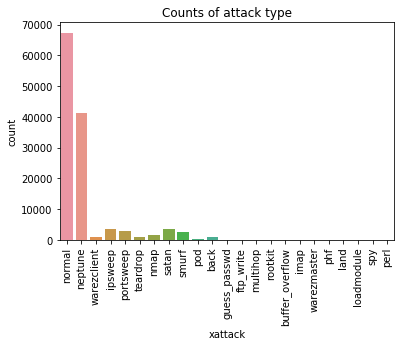

In [66]:
sns.countplot(df.xattack);
plt.xticks(rotation=90);
plt.title('Counts of attack type')

In [40]:
df.xattack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: xattack, dtype: int64

## Targetごとのプロトコル情報

In [101]:
def protocol_by_attack(column):
    counts = df[df.xattack.isin(attack_class[column])].protocol_type.value_counts()
    
    sns.countplot(df[df.xattack.isin(attack_class[column])].protocol_type, order=counts.index)
    plt.xticks(rotation=90);
    plt.title('Counts of protocol type group by xattack')
    
    return counts

def service_by_attack(column):
    counts = df[df.xattack.isin(attack_class[column])].service.value_counts()
    sns.countplot(df[df.xattack.isin(attack_class[column])].service, order=counts.index)
    plt.xticks(rotation=90);
    plt.title('Counts of protocol type group by xattack')
    
    return counts

tcp     53600
udp     12434
icmp     1309
Name: protocol_type, dtype: int64

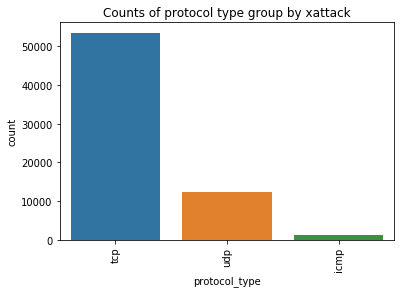

In [102]:
protocol_by_attack("normal")

http        38049
domain_u     9034
smtp         7029
ftp_data     4984
other        2604
private       982
ftp           918
telnet        917
urp_i         599
finger        545
eco_i         497
auth          236
ecr_i         190
pop_3         186
IRC           186
ntp_u         168
time           76
X11            67
domain         38
urh_i          10
red_i           8
tim_i           5
ssh             5
shell           4
tftp_u          3
imap4           3
Name: service, dtype: int64

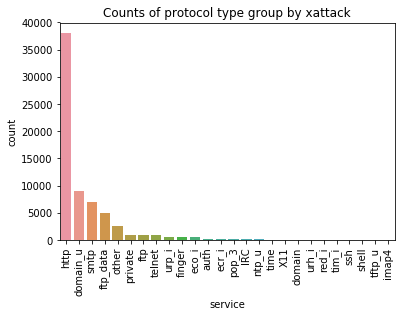

In [103]:
service_by_attack("normal")

icmp    4130
tcp     2931
udp     1664
Name: protocol_type, dtype: int64

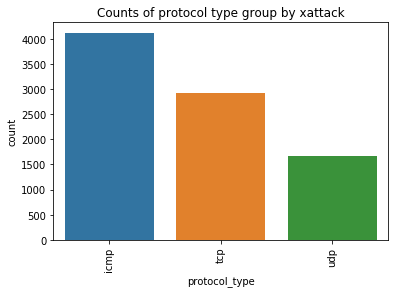

In [104]:
protocol_by_attack("Probe")

eco_i          4085
private        2953
other          1202
ecr_i            42
finger           41
ftp_data         37
smtp             28
telnet           21
gopher           21
ftp              20
http             15
time             15
ssh              14
domain           12
ctf              11
name             10
link             10
mtp              10
whois             9
domain_u          9
rje               9
auth              8
remote_job        7
nntp              6
X11               6
uucp              6
pm_dump           5
netbios_ssn       5
supdup            4
echo              4
               ... 
csnet_ns          4
hostnames         4
vmnet             3
klogin            3
pop_3             3
login             3
printer           3
imap4             3
netbios_dgm       3
uucp_path         3
sql_net           3
discard           3
urp_i             3
exec              3
pop_2             3
kshell            3
iso_tsap          3
Z39_50            3
efs               3


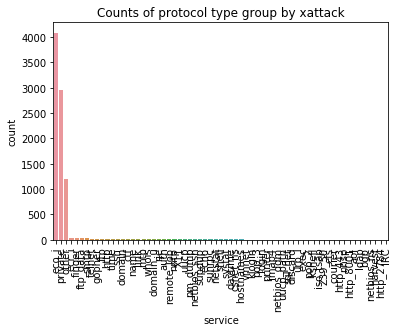

In [105]:
service_by_attack("Probe")

tcp     42188
icmp     2847
udp       892
Name: protocol_type, dtype: int64

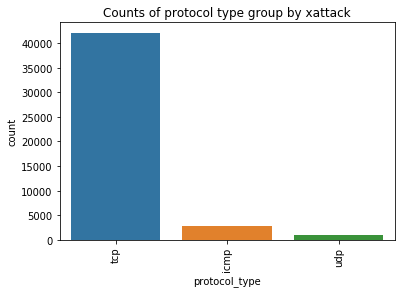

In [106]:
protocol_by_attack("Dos")

private        15971
ecr_i           2844
http            2255
telnet          1312
ftp_data        1209
finger          1168
Z39_50           851
uucp             769
courier          726
auth             703
bgp              699
uucp_path        676
iso_tsap         675
whois            670
nnsp             622
imap4            622
vmnet            606
time             551
ctf              538
csnet_ns         533
supdup           528
http_443         523
discard          520
domain           508
daytime          503
ftp              489
gopher           485
efs              478
exec             465
systat           460
link             454
hostnames        447
name             428
klogin           425
login            420
mtp              416
echo             416
ldap             403
netbios_dgm      392
sunrpc           369
netbios_ssn      349
netstat          344
netbios_ns       336
kshell           292
nntp             281
ssh              281
smtp             241
sql_net      

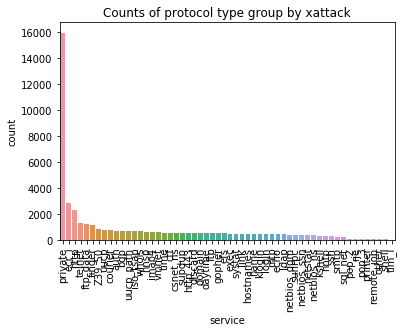

In [107]:
service_by_attack("Dos")

tcp    10
udp     3
Name: protocol_type, dtype: int64

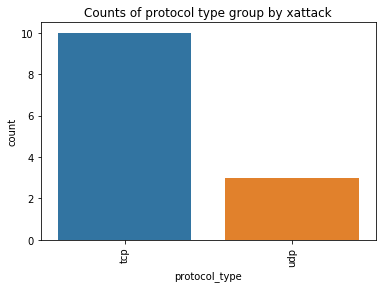

In [108]:
protocol_by_attack("U2R")

telnet      8
other       3
ftp         1
ftp_data    1
Name: service, dtype: int64

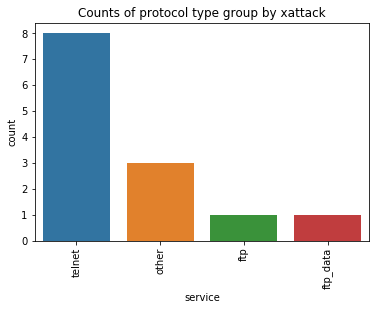

In [109]:
service_by_attack("U2R")

tcp    977
Name: protocol_type, dtype: int64

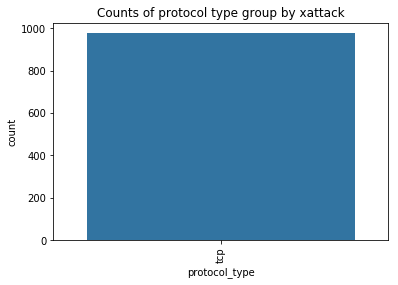

In [110]:
protocol_by_attack("R2L")

ftp_data    601
ftp         310
telnet       55
other         5
http          4
login         2
Name: service, dtype: int64

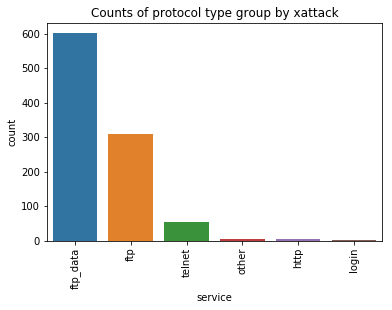

In [111]:
service_by_attack("R2L")